1. Підготувати датасет з двома класами зображень на вибір
(завантажити будь-які картинки двох класів). Наприклад:
зображення котів та собак АБО комаха та квітка АБО літак та
кінь і тд. Для завантаження багатьох зображень рекомендовано
встановити розширення Download all images в google chrome,
посилання на розширення:

2. Завантажити зображення двох класів (відповідно кожен клас в
окремій папці) на google drive.

3. Підключити google drive до вашого google colab notebook

4. Зчитати дані будь-якої картинки та відобразити її в google colab
notebook.

['class-1', 'class-2']
[[[ 28  44  81]
  [ 24  40  77]
  [ 22  38  75]
  ...
  [  0  81 210]
  [  1  82 211]
  [  1  82 211]]

 [[ 24  40  77]
  [ 22  38  75]
  [ 21  37  74]
  ...
  [  0  80 209]
  [  0  80 211]
  [  1  81 212]]

 [[ 23  39  76]
  [ 21  37  74]
  [ 21  37  74]
  ...
  [  0  80 211]
  [  1  81 212]
  [  1  81 212]]

 ...

 [[  1   2  40]
  [  1   2  40]
  [  1   2  40]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   2  40]
  [  1   2  40]
  [  1   2  40]
  ...
  [  0   0   0]
  [  0   0   0]
  [  1   1   1]]

 [[  1   3  38]
  [  0   2  37]
  [  0   0  38]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
(1801, 1800, 3)


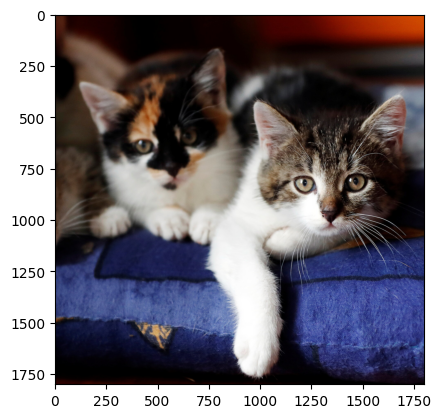

In [20]:
import numpy as np
import cv2
import imghdr
from matplotlib import pyplot as plt
import os

np.set_printoptions(linewidth=np.inf)
data_dir = './drive/MyDrive/Colab Notebooks/data/'

print(os.listdir(data_dir))
concrete_img = cv2.imread(os.path.join(data_dir, 'class-1/00tb-cats1-mediumSquareAt3X.jpg'))
print(concrete_img)
print(concrete_img.shape)

plt.imshow(cv2.cvtColor(concrete_img, cv2.COLOR_BGR2RGB))

5. Перевірити розширення картинок, видалити усі окрім 'jpeg', 'jpg',
'bmp', 'png'.

In [21]:
extensions = ['jpg', 'jpeg', 'png', 'bmp']
for image_class in os.listdir(data_dir) :
    print(f' - {image_class}')
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(f'\t --  {image}')
      image_path = os.path.join(data_dir, image_class, image)
      try:
        image_ext = imghdr.what(image_path)
        if image_ext not in extensions:
          print(f'Image {image_path} not in extensions list')
          os.remove(image_path)
      except Exception as ex:
        print(f'Problem with image {image} path : {image_path}')


 - class-1
	 --  image11.jpeg
	 --  image16.jpeg
	 --  image24.jpeg
	 --  image9.jpeg
	 --  image28.jpeg
	 --  image31.jpeg
	 --  image40.jpeg
	 --  image22.jpeg
	 --  image41.jpeg
	 --  image17.jpeg
	 --  image37.jpeg
	 --  image25.jpeg
	 --  image7.jpeg
	 --  image15.jpeg
	 --  image29.jpeg
	 --  image20.jpeg
	 --  image18.jpeg
	 --  image38.jpeg
	 --  image35.jpeg
	 --  image42.jpeg
	 --  image23.jpeg
	 --  image14.jpeg
	 --  image34.jpeg
	 --  image8.jpeg
	 --  image39.jpeg
	 --  image.jpeg
	 --  image33.jpeg
	 --  image19.jpeg
	 --  image30.jpeg
	 --  image36.jpeg
	 --  image32.jpeg
	 --  image4.jpeg
	 --  image27.jpeg
	 --  image10.jpeg
	 --  image26.jpeg
	 --  image45.jpeg
	 --  image21.jpeg
	 --  image46.jpeg
	 --  image2.jpeg
	 --  image6.jpeg
	 --  image43.jpeg
	 --  image5.jpeg
	 --  image13.jpeg
	 --  image12.jpeg
	 --  image3.jpeg
	 --  image44.jpeg
	 --  KHQb3Ny62YxXnCEon4mm43-1200-80.jpg
	 --  tabby-cat-playing-with-toy-mouse-1024x615.jpg
	 --  kitty-cat-kitten-pet-45201

6. Створити датасет з картинок за допомогою
tf.keras.utils.image_dataset_from_directory

7. Створити numpy_iterator з датасету (використати
as_numpy_iterator метод).

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

data = tf.keras.utils.image_dataset_from_directory(data_dir)
# tf.keras.utils.image_dataset_from_directory??
data_iterator = data.as_numpy_iterator()

Found 299 files belonging to 2 classes.


8. Нормалізувати дані.

In [23]:
tuple_data_index = 0
tuple_label_index = 1
data = data.map(lambda index, label : (index/255, label))
data_scaled_iterator = data.as_numpy_iterator()

max : 1.0
min : 0.0


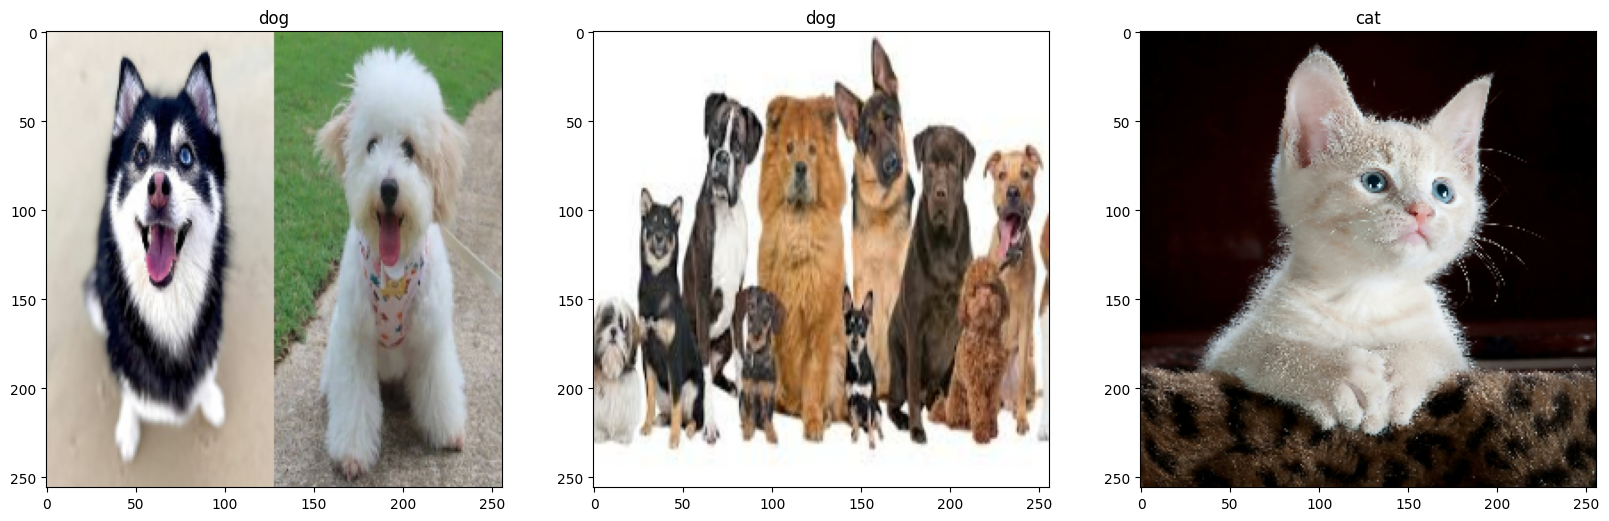

In [25]:
scaled_batch = data_scaled_iterator.next()
print(f'max : {scaled_batch[tuple_data_index].max()}')
print(f'min : {scaled_batch[tuple_data_index].min()}')

elems = 3
fig, ax = plt.subplots(ncols = elems, figsize = (20, 20))
for idx, img in enumerate(scaled_batch[tuple_data_index][:elems]):
    ax[idx].imshow(img)
    ax[idx].title.set_text("cat" if scaled_batch[tuple_label_index][idx] == 0 else "dog")

9. Розділити дані на тренувальні, валідаційні та тестувальні.

In [29]:
train_size = round(len(data) * 0.7)
val_size = round(len(data) * 0.2)
test_size = round(len(data) * 0.1)
print(f"Train : {train_size} | Value : {val_size} | Test : {test_size}")

# ================

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


Train : 7 | Value : 2 | Test : 1


10.Реалізувати згорткову нейронну мережу (CNN) використовуючи
шари Conv2D, MaxPooling2D, Flatten, Dense.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])



11. Натренувати нейронну мережу та протестувати, відобразити
результати тестування.

In [32]:
hist = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
7/7 [==============================] - 10s 885ms/step - loss: 1.4055 - accuracy: 0.6027 - val_loss: 0.6595 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 9s 815ms/step - loss: 0.6749 - accuracy: 0.5982 - val_loss: 0.6098 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.6494 - accuracy: 0.6071 - val_loss: 0.5753 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 14s 2s/step - loss: 0.6056 - accuracy: 0.6339 - val_loss: 0.4539 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 9s 964ms/step - loss: 0.5330 - accuracy: 0.7321 - val_loss: 0.5007 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 9s 977ms/step - loss: 0.4708 - accuracy: 0.7545 - val_loss: 0.3842 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 9s 975ms/step - loss: 0.3783 - accuracy: 0.8348 - val_loss: 0.2802 - val_accuracy: 0.9375
Epoch 8/20
7/7 [=======

TEST

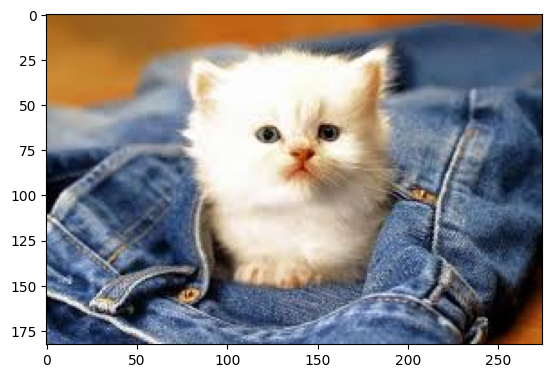

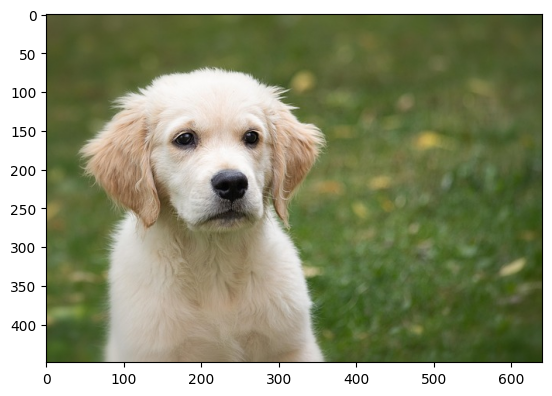

In [39]:
import cv2
test_data_dir = './drive/MyDrive/Colab Notebooks/test-data'
catimg = cv2.imread(f'{test_data_dir}/kitty.jpg')
plt.imshow(cv2.cvtColor(catimg, cv2.COLOR_BGR2RGB))
plt.show()
dogimg = cv2.imread(f'{test_data_dir}/puppy.jpg')
# dogimg = cv2.imread(f'{test_data_dir}/dog_looks_like_cat_meme.jpg') #quess as cat actually xd
plt.imshow(cv2.cvtColor(dogimg, cv2.COLOR_BGR2RGB))

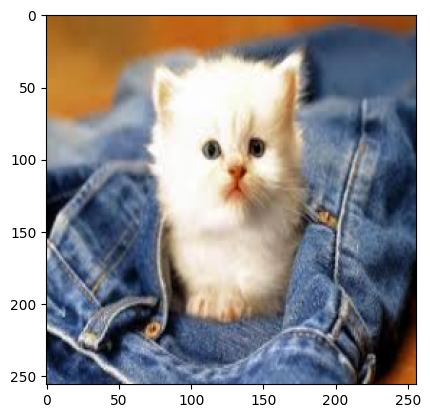

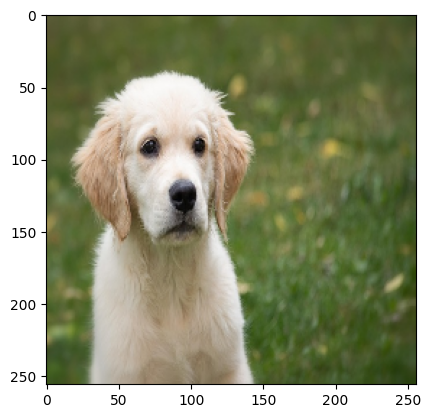

In [40]:
catResize = tf.reverse(tf.image.resize(catimg, (256,256)), axis=[-1])
dogResize = tf.reverse(tf.image.resize(dogimg, (256,256)), axis=[-1])

plt.imshow(catResize.numpy().astype(int))
plt.show()
plt.imshow(dogResize.numpy().astype(int))

In [42]:
def guessAnimal(pred):
  print(pred)
  if pred > 0.5:
    print('cat')
  else:
    print('dog')

catNorm = catResize / 255
dogNorm = dogResize / 255
input = np.array([catNorm, dogNorm])
predictions = model.predict(input)
for prediction in predictions:
  guessAnimal(prediction)


1/1 [==============================] - 0s 63ms/step
[0.9377672]
cat
[0.14141937]
dog
